<h1>Importing Libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Loading the Dataset</h1>

In [2]:
df1 = pd.read_csv('/home/hp/Desktop/TMR-EDA/Data/Final_Res-2ndSept.csv')
df1.head(2)

Admit ID RFP % Present RFP Last Status RFP Last Internal Rating  \
0  CIC012021-8041           76%    Need No Help       Meets expectations   
1  CIC012021-8044           89%  Need Less Help       Improvement needed   

   RFP Last TRACK Score  RFP Tech Ability \n(Out of 2)  \
0                   0.0                           1.68   
1                   3.6                           1.22   

   RFP- Learnability \n(Out of 2)       Last Graduation  \
0                            1.72  B.E. / B.TECH Non IT   
1                            1.51      B.E. / B.TECH CS   

   RFP-Communicability \n(Out of 1)  RFP Avg TRACK Score TechCategory  \
0                              0.86                 4.26    FullStack   
1                              0.67                 3.40    AdvTech-1   

   Trial Avg TRACK Score  Trial Communicability Score (Out of 1.0)  \
0                   3.69                                      0.59   
1                   3.23                                      0.62   

  Trial Last Internal Rating  Trial Learnability Score (Out of 2.0)  \
0       Exceeds expectations                                  1.475   
1         Meets expectations                                  1.050   

   Trial Techability Score (Out of 2.0) Trial % Present    Year  
0                                 1.625         100.00%  2019.0  
1                                 1.560         100.00%  2020.0

<h3>Renaming the columns</h3>

In [3]:
df1 = df1.rename(columns={ 
                           'RFP Tech Ability \n(Out of 2)':'RFP Tech Ability',
                           'RFP- Learnability \n(Out of 2)':'RFP- Learnability',
                           'RFP-Communicability \n(Out of 1)':'RFP-Communicability',
                           'Trial Techability Score (Out of 2.0)':'Trial Techability Score',
                           'Trial Learnability Score (Out of 2.0)':'Trial Learnability Score',
                           'Trial Communicability Score (Out of 1.0)':'Trial Communicability Score'
                            })
df1.head(3)

Admit ID RFP % Present RFP Last Status RFP Last Internal Rating  \
0  CIC012021-8041           76%    Need No Help       Meets expectations   
1  CIC012021-8044           89%  Need Less Help       Improvement needed   
2  CIC012021-8052           79%  Need Less Help       Meets expectations   

   RFP Last TRACK Score  RFP Tech Ability  RFP- Learnability  \
0                   0.0              1.68               1.72   
1                   3.6              1.22               1.51   
2                   4.4              1.74               1.75   

        Last Graduation  RFP-Communicability  RFP Avg TRACK Score  \
0  B.E. / B.TECH Non IT                 0.86                 4.26   
1      B.E. / B.TECH CS                 0.67                 3.40   
2      B.E. / B.TECH CS                 0.93                 4.42   

  TechCategory  Trial Avg TRACK Score  Trial Communicability Score  \
0    FullStack                   3.69                         0.59   
1    AdvTech-1                   3.23                         0.62   
2    FullStack                   4.46                         0.94   

  Trial Last Internal Rating  Trial Learnability Score  \
0       Exceeds expectations                     1.475   
1         Meets expectations                     1.050   
2         Meets expectations                     1.790   

   Trial Techability Score Trial % Present    Year  
0                    1.625         100.00%  2019.0  
1                    1.560         100.00%  2020.0  
2                    1.730          84.62%  2020.0

In [4]:
columns = ['RFP Last Internal Rating','Trial Last Internal Rating','Trial % Present','RFP Avg TRACK Score',
           'Trial Avg TRACK Score','RFP Tech Ability','RFP Last TRACK Score','Trial Techability Score',
           'TechCategory']

In [5]:
df1 = df1[columns]
df1.head(2)

RFP Last Internal Rating Trial Last Internal Rating Trial % Present  \
0       Meets expectations       Exceeds expectations         100.00%   
1       Improvement needed         Meets expectations         100.00%   

   RFP Avg TRACK Score  Trial Avg TRACK Score  RFP Tech Ability  \
0                 4.26                   3.69              1.68   
1                 3.40                   3.23              1.22   

   RFP Last TRACK Score  Trial Techability Score TechCategory  
0                   0.0                    1.625    FullStack  
1                   3.6                    1.560    AdvTech-1

<h3>Dividing the dataframe into 80:20 ratio</h3>

In [6]:
# splitting dataframe by row index
part_80_df = df1.iloc[:915,:]
part_20_df = df1.iloc[915:,:]
print(part_80_df.shape)
print(part_20_df.shape)

(915, 9)
(229, 9)


In [7]:
part_80_df.to_csv('/home/hp/Desktop/TMR-EDA/Data/part_80.csv', index=False)
part_20_df.to_csv('/home/hp/Desktop/TMR-EDA/Data/part_20.csv', index=False)

In [8]:
# part_80_df.describe()

In [9]:
# part_20_df.describe()

In [12]:
part_80_df.drop(part_80_df.loc[(part_80_df['RFP Avg TRACK Score']>5.0) | 
                     (part_80_df['Trial Avg TRACK Score']>5.0) | 
                     (part_80_df['RFP Tech Ability']>2.0) |
                     (part_80_df['RFP Last TRACK Score']>5.0) |
                     (part_80_df['Trial Techability Score']>2.0)].index, inplace = True)

/tmp/ipykernel_5551/1524781897.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_80_df.drop(part_80_df.loc[(part_80_df['RFP Avg TRACK Score']>5.0) |


In [13]:
part_80_df.shape

(915, 9)

In [14]:
# Removing the % symbol from the 'Trial % Present'

part_80_df.replace('\%', '', regex=True,inplace=True)

# Changing the type of 'Trial % Present' column from object to float
part_80_df['Trial % Present'] = part_80_df['Trial % Present'].astype('float64')
part_80_df.head(2)

/tmp/ipykernel_5551/2939050299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_80_df.replace('\%', '', regex=True,inplace=True)
/tmp/ipykernel_5551/2939050299.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  part_80_df['Trial % Present'] = part_80_df['Trial % Present'].astype('float64')


RFP Last Internal Rating Trial Last Internal Rating  Trial % Present  \
0       Meets expectations       Exceeds expectations            100.0   
1       Improvement needed         Meets expectations            100.0   

   RFP Avg TRACK Score  Trial Avg TRACK Score  RFP Tech Ability  \
0                 4.26                   3.69              1.68   
1                 3.40                   3.23              1.22   

   RFP Last TRACK Score  Trial Techability Score TechCategory  
0                   0.0                    1.625    FullStack  
1                   3.6                    1.560    AdvTech-1

<h3>Checking for null values</h3>

In [15]:
pd.DataFrame(part_80_df.isna().sum())

0
RFP Last Internal Rating     25
Trial Last Internal Rating  150
Trial % Present               3
RFP Avg TRACK Score          27
Trial Avg TRACK Score        54
RFP Tech Ability             27
RFP Last TRACK Score         15
Trial Techability Score      57
TechCategory                 24

<h3>Drop null values</h3>

In [16]:
part_80_df = part_80_df.dropna(subset=['RFP Last Internal Rating','Trial Last Internal Rating','Trial % Present','RFP Avg TRACK Score',
           'Trial Avg TRACK Score','RFP Tech Ability','RFP Last TRACK Score','Trial Techability Score',
           'TechCategory'])

In [17]:
pd.DataFrame(part_80_df.isna().sum())

0
RFP Last Internal Rating    0
Trial Last Internal Rating  0
Trial % Present             0
RFP Avg TRACK Score         0
Trial Avg TRACK Score       0
RFP Tech Ability            0
RFP Last TRACK Score        0
Trial Techability Score     0
TechCategory                0

In [18]:
part_80_df.shape

(704, 9)

<h1>Encoding</h1>

In [19]:
part_80_df['Trial Last Internal Rating'] = part_80_df['Trial Last Internal Rating'].replace({'Unsatisfactory': 0, 'Improvement needed': 1,
                                                                                              'Meets expectations':2, 'Exceeds expectations':3,
                                                                                              'Exceptional':4})

In [20]:
part_80_df['RFP Last Internal Rating'] = part_80_df['RFP Last Internal Rating'].replace({'Unsatisfactory': 0, 'Improvement needed': 1,
                                                                                              'Meets expectations':2, 'Exceeds expectations':3,
                                                                                              'Exceptional':4})

In [21]:
part_80_df['TechCategory'] = part_80_df['TechCategory'].replace({'FullStack': 3, 'AdvTech-1': 2,
                                                                    'AdvTech-2':2, 'BasicTech':1,
                                                                    'StdTech':0, 'DeepTech':3,
                                                                  })

In [22]:
part_80_df.shape

(704, 9)

In [27]:
training_data = part_80_df
training_data.shape

(704, 9)

In [29]:
category = [0,1,2,3]
labels = ['StdTech','BasicTech','AdvTech(1+2)','FullStack+DeepTech']

/home/hp/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


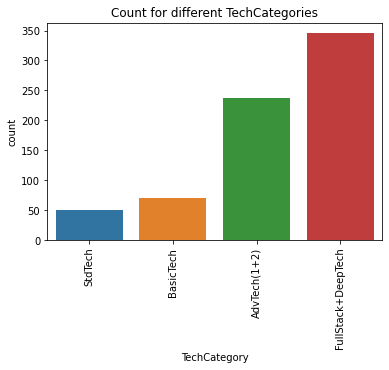

In [30]:
sns.countplot(training_data["TechCategory"]).set_title('Count for different TechCategories')
plt.xticks(category,labels,rotation ='vertical')
plt.show()

In [31]:
percentage_of_data_in_each_class = training_data['TechCategory'].value_counts() * 100/len(training_data)
percentage_of_data_in_each_class

3    49.147727
2    33.806818
1     9.943182
0     7.102273
Name: TechCategory, dtype: float64

<h1>Visualization</h1>

In [32]:
def visualize(df):
    for col in df.columns:
        if df[col].dtype == "float64":
            sns.violinplot(x ='TechCategory', y =col , data = training_data)
            plt.xticks(category,labels,rotation ='vertical')
            plt.show()

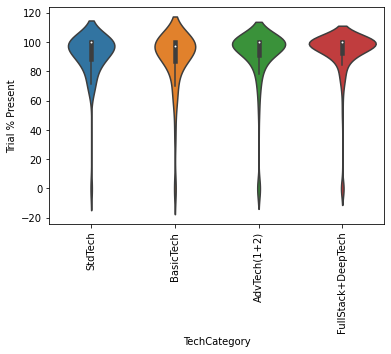

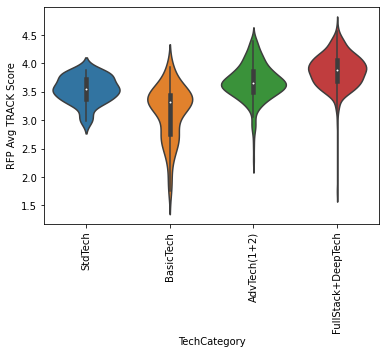

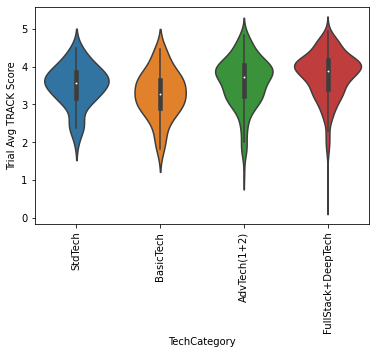

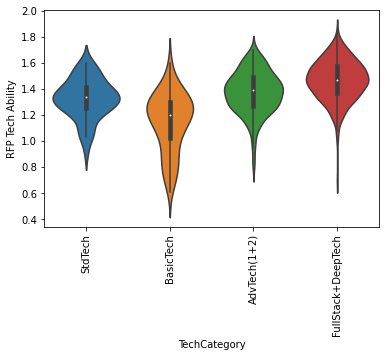

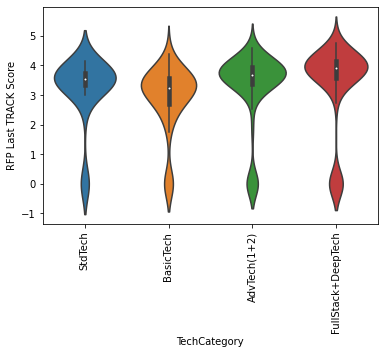

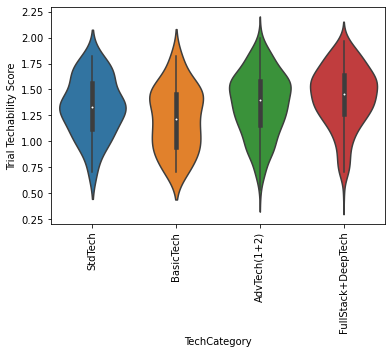

In [33]:
visualize(training_data)

In [34]:
def distribution_of_each_category(df):
    print(df["TechCategory"].value_counts())
    df.groupby('TechCategory').size().plot(kind='pie',y = "TechCategory",
                                       label = "TechCategory",
                                       autopct='%1.1f%%')
    plt.show()

3    346
2    238
1     70
0     50
Name: TechCategory, dtype: int64


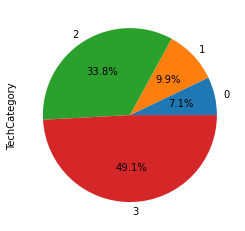

In [35]:
distribution_of_each_category(training_data)

In [36]:
labels = ['StdTech','BasicTech','AdvTech(1+2)','FullStack+DeepTech']
StdTech = training_data[training_data["TechCategory"] == 0]
BasicTech = training_data[training_data["TechCategory"] == 1]
AdvTech_1_2 = training_data[training_data["TechCategory"] == 2]
FullStack_DeepTech = training_data[training_data["TechCategory"] == 3]
print(StdTech.shape)
print(BasicTech.shape)
print(AdvTech_1_2.shape)
print(FullStack_DeepTech.shape)

(50, 9)
(70, 9)
(238, 9)
(346, 9)


In [37]:
cat_list = [StdTech,BasicTech,AdvTech_1_2]

<h1>Sampling</h1>

In [38]:
from sklearn.utils import resample

In [39]:
def sample(cat_list, cat):
    resultant_list = []
    for i in cat_list:
        i  = resample(i,
             replace=True,
             n_samples=len(cat),
             random_state=42)
        resultant_list.append(i)
    resultant_list.append(cat)
    return resultant_list

In [40]:
resultant_list = sample(cat_list, FullStack_DeepTech)
training_data_sampled = pd.concat(resultant_list)

In [41]:
# training_data_sampled.head(2)

0    346
1    346
2    346
3    346
Name: TechCategory, dtype: int64


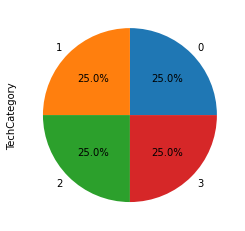

In [42]:
distribution_of_each_category(training_data_sampled)

In [43]:
y = training_data_sampled['TechCategory']
X = training_data_sampled.drop(['TechCategory'], axis=1)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [45]:
def model_buidling(X, y , classifier, n_cross_validation, param_grid):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)
    clf_Grid = GridSearchCV(estimator = classifier, param_grid=param_grid, cv=n_cross_validation, verbose=2, n_jobs=4)
    clf_Grid.fit(X_train, y_train)
    train_accuracy = clf_Grid.score(X_train, y_train)
    test_accuracy = clf_Grid.score(X_test, y_test)
    return clf_Grid.best_params_, train_accuracy, test_accuracy

<h1>SVC</h1>

In [46]:
svc_clf = SVC(gamma='auto')
param_Grid = {'C':[0.1,1,10,100],
              'gamma':[1,0.1,0.01,0.001],
              'kernel':['rbf']
            }

In [47]:
best_params, train_accuracy, test_accuracy = model_buidling(X, y, svc_clf, 10, param_Grid)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [48]:
print(best_params)
print(train_accuracy)
print(test_accuracy)

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}
0.981029810298103
0.8592057761732852


<h1>Random Forest</h1>

In [49]:
rf_clf = RandomForestClassifier()


# The number of trees in the forest.
n_estimators = [ int(x) for x in np.linspace(start=10, stop=80, num=10) ]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,3,4,5,10]
# Minimum number of samples required to split a node
min_samples_split = [2,3,5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2]
# Method of selecting samples for training each tree
bootstrap = [True, False]


# Create the param grid
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': min_samples_split,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [50]:
best_params, train_accuracy, test_accuracy = model_buidling(X, y, rf_clf, 10, param_grid)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ...........................C=1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .........................C=1, gamma

In [51]:
print(best_params)
print(train_accuracy)
print(test_accuracy)

{'bootstrap': False, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 64}
0.7660343270099368
0.6642599277978339


<h1>Logistic Regression</h1>

In [52]:
lr_clf = LogisticRegression()

param_grid = [{
                'penalty':['l1','l2','elasticnet','none'],
                'C':np.logspace(-4,4,20),
                'solver':['lbfgs','newton-cg','liblinear','sag','saga'],
                'max_iter':[100,1000,2500,5000]
            }]

In [53]:
best_params, train_accuracy, test_accuracy = model_buidling(X, y, lr_clf, 10, param_grid)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=17; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=17; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=17; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=17; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=25; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=25; total time=   0.0s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=25; total t

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=41; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=41; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=48; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=48; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=48; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=48; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=64; total time=   0.1s
[CV] END bootstrap=False, max_depth=5, max_features=sqr

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was 

[CV] END ...C=0.0001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.0001, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....C=0.0001, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ...C=0.0001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ...C=0.0001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, ma

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

[CV] END C=0.0001, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=100, p

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

[CV] END ..C=0.0001, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0001, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0001, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0001, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0001, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0001, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0001, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0001, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0001, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0001, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_i

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END ....C=0.0001, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....C=0.0001, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....C=0.0001, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.0001, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.0001, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.0001, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.0001, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.0001, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.0001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=0.0001, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END ....C=0.000

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END ...C=0.0001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.0001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.0001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=0.0001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ...C=0.0001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ...C=0.0001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ...C=0.0001, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....C=0.0001

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.0001, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END ..C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.0001, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0001, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0001, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

[CV] END C=0.00026366508987303583, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, p

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=1000, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=1000, penalty=l1, solver

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='n

[CV] END C=0.00026366508987303583, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.000263665089873

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=2500, penalty=

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.00026366508987303583, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=0.00026366508987303583, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=2500, penalty=elasticnet, so

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=saga; total time=   0.1s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=saga; total time=   0.1s
[CV] END C=0.00026366508987303583, max_ite

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.00026

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=0.00026366508987303583, max_iter=5000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=lbfgs; total time=   1.0s
[CV] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=lbfgs; total time=   1.0s
[CV] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=lbfgs; total time=   1.2s
[CV] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=lbfgs; total time=   1.0s
[CV] END C=0.00026366508987303583, max_ite

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

[CV] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=lbfgs; total time=   1.1s
[CV] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.9s
[CV] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.9s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.00069519279617756

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.0006951927961775605, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=saga; total time=   0.1s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=saga; total time=   0.1s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=none, sol

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=saga; total time=   2.1s
[CV] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=saga; total time=   2.1s
[CV] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=saga; total time=   2.1s
[CV] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=saga; total time=   2.1s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=100, pe

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.0006951927961775605, max_iter=2500, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=0.0006951927961775605, max_iter=2500, penalty=l2, solver=saga; total time=   0.5s
[CV] END C=0.0006951927961775605, max_iter=2500, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.0006951927961775605, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=5000, pen

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.0006951927961775605, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=1000, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=0.0006951927961775605, max_iter=1000, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=0.0006951927961775605, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=0.0006951927961775605, max_iter=1000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=0.0006951927961775605, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.0006951927961775605, max_iter=1000, 

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=2500, penalty=l1, solver=saga

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

[CV] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=sag; total time=   1.8s
[CV] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=sag; total time=   1.8s
[CV] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=sag; total time=   1.8s
[CV] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=sag; total time=   1.8s
[CV] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=sag; total time=   1.8s
[CV] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=sag; total time=   1.8s
[CV] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=sag; total time=   1.8s
[CV] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=sag; total time=   1.8s
[CV] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=sag; total time=   1.8s
[CV] END C=0.00026366508987303583, max_iter=5000, penalty=none, solver=sag; total time=   1.8s
[CV] END C=0.00026366508987303583, max_iter=5000, 

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

[CV] END C=0.0018329807108324356, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, max_

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.0006951927961775605, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.0006951927961775605, max_iter=500

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='n

[CV] END C=0.0018329807108324356, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=non

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.0018329807108324356, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=1000, 

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.0018329807108324356, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, ma

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=0.0006951927961775605, max_iter=5000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=l2, solver=sag; total time=   0.2s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=lbfgs; total time=   0.9s
[CV] END C=0.0006951927961775605, max_iter=5000, penalty=none, solver=

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=100, penalty=none, solv

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use


[CV] END C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.00183298071083

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=lbfgs; total time=   1.2s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=lbfgs; total time=   1.1s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was 

[CV] END C=0.004832930238571752, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=saga; total time=   2.0s
[CV] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=saga; total time=   2.0s
[CV] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=saga; total time=   2.0s
[CV] END C=0.004832930238571752, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=100, penalty=l1, solver=lbfgs

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=0.004832930238571752, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=l1, solver=saga; total time=   0

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

[CV] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=sag; total time=   0.9s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=sag; total time=   0.9s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=sag; total time=   0.9s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=sag; total time=   0.9s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=sag; total time=   0.9s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=sag; total time=   0.9s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=sag; total time=   0.9s
[CV] END C=0.0018329807108324356, max_iter=2500, penalty=none, solver=sag; total time=   0.9s
[CV] END C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=saga; total time=   0.6s
[CV] END C=0.0018329807108324356, max_iter=5000, penalt

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='n

[CV] END C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=saga; total time=   0.6s
[CV] END C=0.0018329807108324356, max_iter=5000, penalty=l2, solver=saga; total time=   0.6s
[CV] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=0.0018329807108324356, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.0

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=0.004832930238571752, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.00483293023857175

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.004832930238571752, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=l1, solver=sag; 

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.004832930238571752, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=l2, solver=saga; total time=   0.8s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=l2, solver=saga; total time=   0.8s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=l2, solver=saga; total time=   0.8s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=l2, solver=sa

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=0.004832930238571752, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=l1, 

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=0.012742749857031334, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.012742749857031334, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed

[CV] END C=0.004832930238571752, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=2500, penalty

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=0.012742749857031334, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=100, penalty=elasticne

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=0.012742749857031334, max_iter=1000, penalt

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=sag; total time=   1.7s
[CV] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=sag; total time=   1.8s
[CV] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=sag; total time=   1.8s
[CV] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=sag; total time=   1.8s
[CV] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=sag; total time=   1.8s
[CV] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=sag; total time=   1.8s
[CV] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=saga; total time=   2.0s
[CV] END C=0.004832930238571752, max_iter=5000, pen

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=l2, solver=sa

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.012742749857031334, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=2500, penalty=l1, solver=saga; total time=   1.2s
[CV] END C=0.012742749857031334, max_iter=2500, penalty=l1, solver=saga; total time=   1.3s
[CV] END C=0.012742749857031334, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=0.012742749857031334, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.3s
[CV] END C=0.012742749857031334, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=0.012742749857031334, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.4s
[CV] END C=0.012742749857031334, max_iter=2500, penalty=l2, solver=lbfgs

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.012742749857031334, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=2500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=2500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=2500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=2500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=2500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=2500, penalty=elasticnet, solver=saga; tot

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=lbfgs; total time=   1.0s
[CV] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=lbfgs; total time=   1.2s
[CV] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=lbfgs; total time=   1.0s
[CV] END C=0.03359818286283781, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=100, penalty=l1, solver=newton-cg

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=0.03359818286283781, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.03359818286283781, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.03359818286283781, max_iter=100, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=0.03359818286283781, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=0.03359818286283781, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=100, pe

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=saga; total time=   2.0s
[CV] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=saga; total time=   2.0s
[CV] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=saga; total time=   2.1s
[CV] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=saga; total time=   2.1s
[CV] END C=0.004832930238571752, max_iter=5000, penalty=none, solver=saga; total time=   2.1s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=none, solver=sag; total time=   0.4s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=none, solver=sag; total time=   0.4s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=0.012742749857031334, max_iter=1000, penalty=none, 

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=0.012742749857031334, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=5000, penalty=elasticnet, solv

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=0.03359818286283781, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.03359818286283781, max_iter=1000, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.6s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.6s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.6s
[CV] END C=0.03359818286283781, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.6s
[CV] END C=0.03359818286283781, max_iter=2500, penalty=l1, solver=lbfgs; total ti

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=lbfgs; total time=   1.1s
[CV] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.012742749857031334, max_iter=5000, penalty=none, solver=sag; total time=   1.7s
[CV] END C=0.0127427

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=l1, solver=sag; total time=   0.0

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was 

[CV] END C=0.08858667904100823, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=0.08858667904100823, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=0.08858667904100823, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=0.08858667904100823, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=0.08858667904100823, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.08858667904100823, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.08858667904100823, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.08858667904100823, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.08858667904100823, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.08858667904100823, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.08858667904100823, max_iter=100, penalty=l2, solver=n

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed

[CV] END C=0.08858667904100823, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.088586679041

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

[CV] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.0335981

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

[CV] END C=0.03359818286283781, max_iter=5000, penalty=l2, solver=sag; total time=   0.8s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=l2, solver=sag; total time=   0.8s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=l2, solver=sag; total time=   0.8s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=l2, solver=saga; total time=   1.2s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=l2, solver=saga; total time=   1.2s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=l2, solver=saga; total time=   1.3s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=none, solv

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=0.03359818286283781, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.03359818286283781, max_iter=5000, penalty=elasticnet, solver=sa

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.08858667904100823, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=1000, penalty=elasticne

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.08858667904100823, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=5000, penalty=l1, solver=ne

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=sag; total time=   0.9s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=sag; total time=   0.9s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=sag; total time=   0.9s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=sag; total time=   0.9s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=sag; total time=   0.9s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=saga; total time=   1.0s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=saga; total time=   1.0s
[CV] END C=0.08858667904100823, max_iter=5000, penalty=l1, solver=saga; total time=   1.9s
[CV] END C=0.08858667904100823, max_iter=5000, penalty=l1, solver=saga; total time=   1.9s
[CV] END C=0.08858667904100823, max_iter=5000, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END C=0.08858667904100823, max_iter=5000, penalty=l2, solver=lbfgs; total t

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=0.23357214690901212, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.23357214690901212, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.23357214690901212, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=0.23357214690901212, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.23357214690901212, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.23357214690901212, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.23357214690901212, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.23357214690901212, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.23357214690901212, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=100, pena

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed

[CV] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=saga; total time=   1.2s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=l1, solver=saga; total time=   1.3s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=l2, solver=sag; total time=   0.9s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=l2, solver=sag; total time=   0.9s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=l2, solver=sag; total time=   0.9s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=l2, solver=saga; total time=   1.0s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=l2, solver=saga; t

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=0.08858667904100823, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.0885

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='n

[CV] END C=0.23357214690901212, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.23357214690901212, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.23357214690901212, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.23357214690901212, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.23357214690901212, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.23357214690901212, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.23357214690901212, max_iter=100, pena

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.08858667904100823, max_iter=2500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.08858667904100823, max_iter=2500, penalty=none, solver=lbfgs; total time=   1.0s
[CV] END C=0.0885866

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=0.23357214690901212, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=1000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=1000, penalty=l1, solver=liblin

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.6s
[CV] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=l1, solver=lbfgs; tot

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.23357214690901212, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=elasticnet, solve

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.23357214690901212, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.6s
[CV] END C=0.23357214690901212, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.5s
[CV] END C=0.2335721

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=0.23357214690901212, max_iter=2500, penalty=l2, solver=sag; total time=   0.9s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=l2, solver=sag; total time=   0.9s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=l2, solver=saga; total time=   1.0s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=l2, solver=saga; total time=   1.0s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=l2, solver=saga; total time=   1.0s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=0.23357214690901212, max_iter=2500, penalty=no

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

[CV] END C=0.615848211066026, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.615848211066026, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.615848211066026, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.615848211066026, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.615848211066026, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.615848

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.615848211066026, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=none, solver=sag; total time=   0.

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='n

[CV] END C=0.615848211066026, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=100, penalty=elasticnet, solver=liblinear; total tim

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

[CV] END C=0.23357214690901212, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=5000, penalty=elasticne

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=0.23357214690901212, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.23357214690901212, max_iter=5000, penalty=l1, solver=saga; total time=   2.3s
[CV] END C=0.23357214690901212, max_iter=5000, penalty=l1, solver=saga; total time=   2.3s
[CV] END C=0.23357214690901212, max_iter=5000, penalty=l1, solver=saga; total time=   2.3s
[CV] END C=0.23357214690901212, max_iter=5000, penalty=l1, solver=saga; total time=   2.2s
[CV] END C=0.23357214690901212, max_iter=5000, penalty=l2, solver=sag; total time=   1.2s
[CV] END C=0.23357214690901212, max_iter=5000, penalty=l2, solver=sag; total time=   1.2s
[CV] END C=0.23357214690901212, max_iter=5000, penalty=l2, solver=sag; total time=   1.2s
[CV] E

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=0.615848211066026, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=1000, penalty=elasticnet, solver=liblinear;

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.615848211066026, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=0.615848211066026, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END C=0.615848211066026, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END C=0.615848211066026, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END C=0.615848211066026, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END C=0.615848211066026, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END C=0.615848211066026, max_iter=2500, penalty=l2, solver=saga; total time=   1.0s
[CV] END C=0.615848211066026, max_iter=2500, penalty=l2, solver=saga; total time=   1.0s
[CV] END C=0.615848211066026, max_iter=2500, penalty=l2, solver=saga; total time=   1.0s
[CV] END C=0.615848211066026, max_iter=2500, penalty=none, solver=lbfgs; total time=   1.0s
[CV] END C=0.615848211066026, max_iter=2500, penalty=none, solver=lbfgs; total time=   1.0s
[CV] END 

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.615848211066026, max_iter=2500, penalty=none, solver=lbfgs; total time=   1.0s
[CV] END C=0.615848211066026, max_iter=2500, penalty=none, solver=lbfgs; total time=   1.1s
[CV] END C=0.615848211066026, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.9s
[CV] END C=0.615848211066026, max_iter=2500, penalty=none, solver=lbfgs; total time=   1.0s
[CV] END C=0.615848211066026, max_iter=2500, penalty=none, solver=saga; total time=   1.0s
[CV] END C=0.615848211066026, max_iter=2500, penalty=none, solver=saga; total time=   1.0s
[CV] END C=0.615848211066026, max_iter=2500, penalty=none, solver=saga; total time=   1.0s
[CV] END C=0.615848211066026, max_iter=2500, penalty=none, solver=saga; total time=   1.0s
[CV] END C=0.615848211066026, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=0.615848211066026, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, max_

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

[CV] END C=0.615848211066026, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.6s
[CV] END C=0.615848211066026, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.6s
[CV] END C=0.615848211066026, max_iter=1000, penalty=none, solver=sag; total time=   0.3s
[CV] END C=0.615848211066026, max_iter=1000, penalty=none, solver=sag; total time=   0.3s
[CV] END C=0.615848211066026, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=0.615848211066026, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=0.615848211066026, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.615848211066026, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.615848211066026, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[C

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=1.623776739188721, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=1.623776739188721, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=1.623776739188721, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=1.623776739188721, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=1.623776739188721, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=1.623776739188721, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=100, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=1.623776739188721, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=100, penalty=l2, solver=sag; total time=   

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

[CV] END C=0.615848211066026, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.615848211066026, max_iter=2500, penalty=elasticnet, solver=liblinear;

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was 

[CV] END C=1.623776739188721, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1.623776739188721,

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=1.623776739188721, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=1.623776739188721, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=1.623776739188721, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=1.623776739188721, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=1000, penalty=l2, sol

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=0.615848211066026, max_iter=5000, penalty=none, solver=sag; total time=   1.8s
[CV] END C=0.615848211066026, max_iter=5000, penalty=none, solver=sag; total time=   1.8s
[CV] END C=0.615848211066026, max_iter=5000, penalty=none, solver=saga; total time=   2.1s
[CV] END C=0.615848211066026, max_iter=5000, penalty=none, solver=saga; total time=   2.1s
[CV] END C=1.623776739188721, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=1.623776739188721, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=1.623776739188721, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=1.623776739188721, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=1.623776739188721, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=1000, penalty=elasticnet, solver=lbfgs; total t

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=1.623776739188721, max_iter=2500, penalty=l1, solver=saga; total time=   1.3s
[CV] END C=1.623776739188721, max_iter=2500, penalty=l1, solver=saga; total time=   1.3s
[CV] END C=1.623776739188721, max_iter=2500, penalty=l1, solver=saga; total time=   1.3s
[CV] END C=1.623776739188721, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=1.623776739188721, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=1.623776739188721, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=2500, penalty=l2, solver=sag; total time=   0.9s
[CV] END C=1.623776739188721, max_iter=2500, penalty=l2, solver=sag; total time=   0.9s
[CV] END C=1.623776739188721, max_iter=2500, penalty=l2, solver=sag; total time=   0.9s
[CV] END C=1.623776739188721, max_iter=2500, penalty=l2, solver=saga; total time=   1.0s
[CV]

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l1, sol

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=1.623776739188721, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=5000, penalty=none, solver=lbfgs; total time=   1.9s
[CV] END C=1.623776739188721, max_iter=5000, penalty=none, solver=lbfgs; total time=   1.8s
[CV] END C=1.623776739188721, max_iter=5000, penalty=none, solver=lbfgs; total time=   1.7s
[CV] END C=1.623776739188721, max_iter=5000, penalty=none, solver=lbfgs; total time=   1.6s
[CV] END C=1.623776739188721, max_iter=5000, penal

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

[CV] END C=1.623776739188721, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.3s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l2, solver=sag; total time=   2.2s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l2, solver=sag; total time=   2.5s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l2, solver=saga; total time=   2.2s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l2, solver=saga; total time=   2.4s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l2, solver=saga; total time= 

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=4.281332398719396, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, 

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

[CV] END C=4.281332398719396, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=4.281332398719396, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=4.281332398719396, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=4.281332398719396, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=4.281332398719396, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=1000, penalty=l1, solver=sa

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

[CV] END C=1.623776739188721, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=1.623776739188721, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=1.623776739188721, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=1.623776739188721, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=1.623776739188721, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=1.623776739188721, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=1.623776739188721, max_iter=2500, penalty=l1, solver=liblin

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=1.623776739188721, max_iter=2500, penalty=none, solver=saga; total time=   1.0s
[CV] END C=1.623776739188721, max_iter=2500, penalty=none, solver=saga; total time=   1.0s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=saga; total time=   2.5s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=saga; total time=   2.6s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l1, solver=saga; total time=   2.9s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l2, solver=lbfgs; total time=   1.3s
[CV] END C=1.623776739188721, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] EN

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=4.281332398719396, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.9s
[CV] END C=4.281332398719396, max_i

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=4.281332398719396, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=4.281332398719396, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=4.281332398719396, max_iter=1000, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=4.281332398719396, max_iter=1000, penalty=l2, solver=sag; total time=   0.5s
[CV] END C=4.281332398719396, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s
[CV] END C=4.281332398719396, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s
[CV] END C=4.281332398719396, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s
[CV] END C=4.281332398719396, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s
[CV] END C=4.281332398719396, max_iter=1000, penalty=l2, solver=saga; total time=   0.5s
[CV] END C=4.281332398719396, max_iter=1000, penalty=l2, solver=saga; total time=   0.7s
[CV] END C=4.281332398719396, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.6s
[CV] END C=4.28133

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=4.281332398719396, max_iter=1000, penalty=none, solver=sag; total time=   0.4s
[CV] END C=4.281332398719396, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=4.281332398719396, max_iter=1000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=4

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=4.281332398719396, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=11.288378916846883, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=11.288378916846883, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=11.28837891

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed

[CV] END C=4.281332398719396, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=4.281332398719396, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=4.281332398719396, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=5000, penalty=none, solver=saga; total time=   2.1s
[CV] END C=4.281332398719396, max_iter=5000, penalty=none, solver=saga; total time=   2.1s
[CV] END C=4.281332398719396, max_iter=5000, penalty=none, solver=saga; total time=   2.1s
[CV] END C=4.281332398719396, max_iter=5000, penalty=none, solver=saga; total time=   2.1s
[CV] END C=11.288378916846883, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=100, penalty=l1, solver=lbfgs; t

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was 

[CV] END C=11.288378916846883, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=11.288378916846883, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=11.288378916846883, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=11.288378916846883, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=11.288378916846883, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=11.288378916846883, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=11.288378916846883, max_iter=100, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=11.288378916846883, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=11.288378916846883, max_iter=100, penalty=none, sol

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: Conv

[CV] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=saga; total time=   1.4s
[CV] END C=4.281332398719396, max_iter=2500, penalty=l1, solver=saga; total time=   2.0s
[CV] END C=4.281332398719396, max_iter=2500, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END C=4.281332398719396, max_iter=2500, penalty=l2, solver=lbfgs; tot

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

[CV] END C=4.281332398719396, max_iter=2500, penalty=none, solver=saga; total time=   1.3s
[CV] END C=4.281332398719396, max_iter=2500, penalty=none, solver=saga; total time=   1.5s
[CV] END C=4.281332398719396, max_iter=2500, penalty=none, solver=saga; total time=   1.3s
[CV] END C=4.281332398719396, max_iter=2500, penalty=none, solver=saga; total time=   1.3s
[CV] END C=4.281332398719396, max_iter=2500, penalty=none, solver=saga; total time=   1.1s
[CV] END C=4.281332398719396, max_iter=2500, penalty=none, solver=saga; total time=   1.2s
[CV] END C=4.281332398719396, max_iter=5000, penalty=l1, solver=saga; total time=   2.8s
[CV] END C=4.281332398719396, max_iter=5000, penalty=l1, solver=saga; total time=   3.2s
[CV] END C=4.281332398719396, max_iter=5000, penalty=l2, solver=lbfgs; total time=   1.4s
[CV] END C=4.281332398719396, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=4.281332398719396, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.1

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=11.288378916846883, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=1000, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=11.288378916846883, max_iter=1000, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=11.288378916846883, max_iter=1000, penalty=l2, solver=sag; total time=   0.4s
[CV] END C=11.288378916846883, max_iter=1000, penalty=l2, solver=sag; total time=   0.3s
[CV] END C=11.288378916846883, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.5s
[CV] END C=11.288378916846883, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.5s
[CV] END C=11.288378916846883, max_iter=1000, penalty=none, solver=lbfgs; tota

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=11.288378916846883, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] E

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=11.288378916846883, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=2500, penalty=none, solver=sag; total time=   0.9s
[CV] END C=11.288378916846883, max_iter=2500, penalty=none, solver=sag; total time=   0.9s
[CV] END C=11.288378916846883, max_iter=2500, penalty=none, solver=saga; total time=   1.0s
[CV] END C=11.288378916846883, max_iter=2500, penalty=none, solver=saga; total time=   1.0s
[CV] END C=11.288378916846883, max_iter=2500, penalty=none, solver=saga; total time=   1.0s
[CV] END C=11.288378916846883, max_iter=2500, penalty=none, solver=saga; total time=   1.0s
[CV] END C=11.288378916846883, max_iter=2500, penalty=none, solver=saga; total time=   1.0s
[CV] END C=11.288378916846883, max_iter=2500, penalty=none, solver=saga; total time=   1.0s
[CV] END C=11.288378916846883, max_iter=5000, penalty=l1, solver=saga; total time=   2.5s
[CV] END C=11.288378916846883, max_iter=5000, penalty=l1, solver=saga; total ti

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=11.288378916846883, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=11.288378916846883, max_iter=5000, penalty=none, solver=lbfgs; total time=   1.0s
[CV] END C=29.763514416313132, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] EN

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='n

[CV] END C=11.288378916846883, max_iter=5000, penalty=none, solver=sag; total time=   1.7s
[CV] END C=11.288378916846883, max_iter=5000, penalty=none, solver=sag; total time=   1.7s
[CV] END C=11.288378916846883, max_iter=5000, penalty=none, solver=sag; total time=   1.7s
[CV] END C=11.288378916846883, max_iter=5000, penalty=none, solver=sag; total time=   1.8s
[CV] END C=29.763514416313132, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=29.763514416313132, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=29.763514416313132, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=100, penalty=l2, solver=sag; tot

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=29.763514416313132, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=1000, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=29.763514416313132, max_iter=1000, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=29.763514416313132, max_iter=1000, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=29.763514416313132, max_iter=1000, penalty=l1, solver=saga; total time=   0.6s
[CV] END C=29.763514416313132, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=29.763514416313132, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] 

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='n

[CV] END C=11.288378916846883, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=11.288378916846883, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=11.288378916846883, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=11.288378916846883, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883,

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=11.288378916846883, max_iter=5000, penalty=l1, solver=saga; total time=   2.5s
[CV] END C=11.288378916846883, max_iter=5000, penalty=l1, solver=saga; total time=   2.5s
[CV] END C=11.288378916846883, max_iter=5000, penalty=l1, solver=saga; total time=   2.6s
[CV] END C=11.288378916846883, max_iter=5000, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END C=11.288378916846883, max_iter=5000, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END C=11.288378916846883, max_iter=5000, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END C=11.288378916846883, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=11.288378916846883, max_iter=5000, penalty=l2, solver=sag; total time=   1.7s
[CV] END C=11.288378916846883, max_iter=5000, penalty=l2, solver=sag; total time=   1.7s
[CV] END C=11.288378916846883, max_iter=5000, penalty=l2, solver=sag; total time=   1.7s
[CV] END C=11.288378916846883, max_iter=5000, penalty=l2, solver=saga; total time=   2.0s
[CV] 

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=saga; total time=   1.3s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=saga; total time=   1.3s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=saga; total time=   1.3s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=saga; total time=   1.3s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l2, solver=libli

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=29.763514416313132, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.6s
[CV] END C=29.763514416313132, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.5s
[CV] END C=29.763514416313132, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.6s
[CV] END C=29.763514416313132, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.6s
[CV] END C=29.763514416313132, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=29.763514416313132, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=lbfgs; total ti

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=29.763514416313132, max_iter=5000, penalty=l2, solver=lbfgs; total time=   1.3s
[CV] END C=29.763514416313132, max_iter=5000, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END C=29.763514416313132, max_iter=5000, penalty=l2, solver=lbfgs; total time=   1.3s
[CV] END C=29.763514416313132, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=29.763514416313132, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=29.763514416313132, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=29.763514416313132, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=29.763514416313132, max_iter=5000, penalty=l2, solver=sag; total time=   1.7s
[CV] END C=29.763514416313132, max_iter=5000, penalty=l2, solver=sag; total time=   1.7s
[CV] END C=29.763514416313132, max_iter=5000, penalty=l2, solver=sag; total time=   1.7s
[CV] END C=29.763514416313132, max_iter=5000, penalty=l2, solver=sag; total time

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=29.763514416313132, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=29.763514416313132, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=29.763514416313132, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=29.763514416313132, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=29.763514416313132, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=29.763514416313132, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=29.763514416313132,

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

[CV] END C=78.47599703514607, max_iter=100, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=78.47599703514607, max_iter=100, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=78.47599703514607, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

[CV] END C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=100, 

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was 

[CV] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=29.7

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END C=78.47599703514607, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=78.47599703514607, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=78.47599703514607, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=78.47599703514607, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END C=78.47599703514607, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=78.47599703514607, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=78.47599703514607, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=1000, penalty=l2, solver=liblinear; total tim

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=29.763514416313132, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=29.763514416313132, max_iter=5000, penalty=elasticnet, solver=newton-c

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=newton-c

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=saga; total time=   1.3s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l2, solver=liblinear

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=78.47599703514607, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.6s
[CV] END C=78.47599703514607, max_iter=1000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=78.47599703514607, max_iter=1000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=78.47599703514607, max_iter=1000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=78.47599703514607, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=78.47

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=206.913808111479, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=206.913808111479, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=206.913808111479, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=206.913808111479, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END C=206.913808111479, max_iter=100, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END C=206.913808111479, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=206.913808111479, max_iter=100, penalty=l1, solver=liblinear; total t

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed

[CV] END C=78.47599703514607, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=5000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=5000, penalty=elasticnet, solver=liblinear;

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=206.913808111479, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=206.913808111479, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=2

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=78.47599703514607, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=78.47599703514607, max_iter=1000, penalty=none, solver=sag; total time=   0.4s
[CV] END C=78.47599703514607, max_iter=1000, penalty=none, solver=sag; total time=   0.4s
[CV] END C=78.47599703514607, max_iter=1000, penalty=none, solver=sag; total time=   0.4s
[CV] END C=78.47599703514607, max_iter=1000, penalty=none, solver=sag; total time=   0.4s
[CV] END C=78.47599703514607, max_iter=1000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=78.47599703514607, max_iter=1000, penalty=none, solver=saga; total time=   0.5s
[CV] END C=78.47599703514607, max_iter=1000, penalty=none, solver=saga; to

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: Conv

[CV] END C=78.47599703514607, max_iter=2500, penalty=none, solver=saga; total time=   1.0s
[CV] END C=78.47599703514607, max_iter=2500, penalty=none, solver=saga; total time=   1.0s
[CV] END C=78.47599703514607, max_iter=2500, penalty=none, solver=saga; total time=   1.0s
[CV] END C=78.47599703514607, max_iter=2500, penalty=none, solver=saga; total time=   1.0s
[CV] END C=78.47599703514607, max_iter=2500, penalty=none, solver=saga; total time=   1.0s
[CV] END C=78.47599703514607, max_iter=2500, penalty=none, solver=saga; total time=   1.0s
[CV] END C=78.47599703514607, max_iter=5000, penalty=l1, solver=saga; total time=   2.6s
[CV] END C=78.47599703514607, max_iter=5000, penalty=l1, solver=saga; total time=   2.6s
[CV] END C=78.47599703514607, max_iter=5000, penalty=l2, solver=lbfgs; total time=   1.3s
[CV] END C=78.47599703514607, max_iter=5000, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END C=78.47599703514607, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.2s
[C

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=206.913808111479, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, max_iter=1000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=206.913808111479, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=206.913808111479, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=206.913808111479, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=206.913808111479, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=206.913808111479, max_iter=1000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=206.913808111479, max_iter=1000, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=206.913808111479, max_iter=1000, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=206.913808111479, max_iter=1000, penalty=l1, solver=saga; total time=

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=206.913808111479, max_iter=1000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=206.913808111479, max_iter=1000, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=206.913808111479, max_iter=1000, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=206.913808111479, max_iter=1000, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=206.913808111479, max_iter=1000, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=206.913808111479, max_iter=1000, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=206.913808111479, max_iter=1000, penalty=l1, solver=saga; total time=   0.5s
[CV] END C=206.913808111479, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=206.913808111479, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=206.913808111479, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=206.913808111479, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=206.913808

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=206.913808111479, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=206.913808111479, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=206.913808111479, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=206.913808111479, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=206.913808111479, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=206.913808111479, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=206.913808111479, max_iter=2500, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=206.913808111479, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, max_iter=2500, penalt

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=206.913808111479, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=206.913808111479, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=206.913808111479, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=206.913808111479, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=206.913808111479, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=206.913808111479, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=206.913808111479, max_iter=1000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=206.913808111479, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.6s
[CV] END C=206.913808111479, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.6s
[CV] END C=206.913808111479, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.6s
[CV] END C=206.913808111479, max_iter=1000, penalty=none, 

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=206.913808111479, max_iter=2500, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END C=206.913808111479, max_iter=2500, penalty=l2, solver=lbfgs; total time=   1.2s
[CV] END C=206.913808111479, max_iter=2500, penalty=l2, solver=saga; total time=   1.0s
[CV] END C=206.913808111479, max_iter=2500, penalty=none, solver=lbfgs; total time=   1.0s
[CV] END C=206.913808111479, max_iter=2500, penalty=none, solver=lbfgs; total time=   1.2s
[CV] END C=206.913808111479, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.9s
[CV] END C=206.913808111479, max_iter=2500, penalty=none, solver=lbfgs; total time=   0.9s
[CV] END C=206.913808111479, max_iter=2500, penalty=none, solver=saga; total time=   1.0s
[CV] END C=206.913808111479, max_iter=2500, penalty=none, solver=saga; total time=   1.0s
[CV] END C=206.913808111479, max_iter=2500, penalty=none, solver=saga; total time=   1.0s
[CV] END C=206.913808111479, max_iter=2500, penalty=none, solver=saga; total time=   1.0s
[CV] END C

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=545.5594781168514, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=545.5594781168514, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=545.5594781168514, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=545.5594781168514, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=545.5594781168514, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=545.5594781168514, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=545.5594781168514, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=100, penalty=l2, solver=libline

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=206.913808111479, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=206.913808111479, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=206.913808111479, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=206.913808111479, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=206.913808111479, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=206.913808111479, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=206.913808111479, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, max_iter=5000, penalt

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was 

[CV] END C=206.913808111479, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=206.913808111479, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, max_iter=2500, penalty=elasticnet, solver=liblinear; total tim

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed

[CV] END C=206.913808111479, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=206.913808111479, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=206.913808111479, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=206.913808111479, max_iter=5000, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=206.913808111479, max_iter=5000, penalty=none, solver=lbfgs; total time=   1.2s
[CV] END C=206.913808111479, max_iter=5000, penalty=none, solver=lbfgs; total time=   1.1s
[CV] END C=206.913808111479, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=206.913808111479, max_iter=5000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=206.913808111479, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=206.913808111479, max_iter=5000, penalty=no

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=545.5594781168514, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=545.

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=545.5594781168514, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=1000, penalty=none, solver=sag; total time=   0.4s
[CV] END C=545.5594781168514, max_iter=1000, penalty=none, solver=sag; total time=   0.4s
[CV] END C=545.5594781168514, max_iter=1000, penalty=none, solver=sag; total time=   0.4s
[CV] END C=545.5594781168514, max_iter=1000, penalty=none, solver=sag; total time=   0.4s
[CV] END C=545.5594781168514, max_iter=1000, penalty=none, solver=sag; total time=   0.4s
[CV] END C=545.5594781168514, max_iter=1000, penalty=none, solver=sag;

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=545.5594781168514, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END C=545.5594781168514, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=545.5594781168514, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=545.5594781168514, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END C=545.5594781168514, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.5s
[CV] END C=545.5594781168514, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=545.5594781168514, max_iter=1000, penalty=none, solver=sag; total time=   0.4s
[CV] END C=545.5594781168514, max_iter=1000, penalty=none, solver=sag; total time=   0.4s
[CV] END C=545.5594781168514, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=545.5594781168514, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=545.5594781168514, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] EN

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=545.5594781168514, max_iter=2500, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END C=545.5594781168514, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END C=545.5594781168514, max_iter=2500, penalty=l2, solver=lbfgs; total time=   1.1s
[CV] END C=545.5594781168514, max_iter=2500, penalty=l2, solver=lbfgs; total time=   1.2s
[CV] END C=545.5594781168514, max_iter=2500, penalty=l2, solver=lbfgs; total time=   1.3s
[CV] END C=545.5594781168514, max_iter=2500, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END C=545.5594781168514, max_iter=2500, penalty=l2, solver=saga; total time=   1.0s
[CV] END C=545.5594781168514, max_iter=2500, penalty=l2, solver=saga; total time=   1.0s
[CV] END C=545.5594781168514, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=2500, penalty=elasticnet, solver=lbfgs; total t

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=545.5594781168514, max_iter=5000, penalty=none, solver=lbfgs; total time=   1.2s
[CV] END C=545.5594781168514, max_iter=5000, penalty=none, solver=lbfgs; total time=   1.0s
[CV] END C=1438.44988828766, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

[CV] END C=545.5594781168514, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=5000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=5000, penalty=none, solver=sag; total time=   1.8s
[CV] END C=545.5594781168514, max_iter=5000, penalty=none, solver=sag; total time=   1.7s
[CV] END C=545.5594781168514, max_iter=5000, penalty=none, solver=sag; total time=   1.7s
[CV] END C=545.5594781168514, max_iter=5000, penalty=none, solver=sag; total time=   1.7s
[CV] END C=1438.44988828766, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=1438.44988828766, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=1438.44988828766, max_iter=100, penalty=l2, solver=liblinear;

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed

[CV] END C=545.5594781168514, max_iter=5000, penalty=l2, solver=saga; total time=   2.0s
[CV] END C=545.5594781168514, max_iter=5000, penalty=l2, solver=saga; total time=   2.0s
[CV] END C=545.5594781168514, max_iter=5000, penalty=l2, solver=saga; total time=   2.0s
[CV] END C=545.5594781168514, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=5000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=5000, pe

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

[CV] END C=1438.44988828766, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=100, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766,

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

[CV] END C=545.5594781168514, max_iter=1000, penalty=none, solver=lbfgs; total time=   0.6s
[CV] END C=545.5594781168514, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=545.5594781168514, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=545.5594781168514, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=545.5594781168514, max_iter=2500, penalty=l1, solver=liblinear; total time=   0.3s
[CV] END C=545.5594781168514, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=545.5594781168514, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='n

[CV] END C=1438.44988828766, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=1000, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=1000, penalty=elasticnet, solver=liblinear; total tim

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=1438.44988828766, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=1438.44988828766, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=1438.44988828766, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=1438.44988828766, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=1438.44988828766, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=1438.44988828766, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=1438.44988828766, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=1000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=1000, penalty=l2, solver=libline

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=1438.44988828766, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=1438.44988828766, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=1438.44988828766, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=1438.44988828766, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=1438.44988828766, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=1438.44988828766, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=1438.44988828766, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=1000, penalty=none, solver=sag; 

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=1438.44988828766, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=1438.44988828766, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=1438.44988828766, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=1438.44988828766, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END C=1438.44988828766, max_iter=1000, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=1438.44988828766, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=1000, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=1000, penalt

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=1438.44988828766, max_iter=5000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=1438.44988828766, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=l2, solver=libline

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=3792.690190732246, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=100, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=3792.690190732246, max_iter=100, penalty=l1, solver=libline

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='n

[CV] END C=1438.44988828766, max_iter=5000, penalty=none, solver=sag; total time=   1.9s
[CV] END C=3792.690190732246, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=3792.690190732246, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=3792.690190732246, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=3792.690190732246, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=100, penalty=l2, solver=sag; total time=   0.0s

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

[CV] END C=1438.44988828766, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=5000, penalty=l1, solver=newton-cg; tota

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=3792.690190732246, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=100, penalty=elasticnet, solver=liblinear; total tim

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=1438.44988828766, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=1438.44988828766, max_iter=2500, penalty=none, solver=sag; total time=   0.9s
[CV] END C=1438.44988828766, max_iter=2500, penalty=none, solver=sag; total time=   0.9s
[CV] END C=1438.44988828766, max_iter=2500, penalty=none, solver=sag; total time=   0.9s
[CV] END C=1438.44988828766, max_iter=2500, penalty=none, solver=sag; total time=   0.9s
[CV] END C=1438.44988828766, max_iter=5000, penalty=l1, solver=liblinear; 

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=3792.690190732246, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END C=3792.690190732246, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=3792.690190732246, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=3792.690190732246, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END C=3792.690190732246, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=3792.690190732246, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=3792.690190732246, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=3792.690190732246, max_iter=1000, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END C=3792.690190732246, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=3792.690190732246, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=3792.690190732246, max_iter=1000, penalty=l2, solver=saga; total time=   0.

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=3792.690190732246, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=1000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=1000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=3792.

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=3792.690190732246, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=3792.690190732246, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=3792.690190732246, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=3792.690190732246, max_iter=1000, penalty=none, solver=saga; total time=   0.4s
[CV] END C=3792.690190732246, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=3792.6901

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END C=3792.690190732246, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2500, penalty=none, solver=sag; total time=   0.9s
[CV] END C=3792.690190732246, max_iter=2500, penalty=none, solver=sag; total time=   0.9s
[CV] END C=3792.690190732246, max_iter=2500, penalty=none, solver=sag; total time=   0.9s
[CV] END C=3792.690190732246, max_iter=2500, penalty=none, solver=sag; total time=   0.9s
[CV] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinea

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=5000, penalty=l1, solver=sag; total time=   0

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable

[CV] END C=10000.0, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=10000.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=10000.0, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....C=10000.0, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....C=10000.0, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....C=10000.0, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...C=10000.0, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...C=10000.0, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...C=10000.0, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...C=10000.0, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...C=10000.

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    htt

[CV] END C=3792.690190732246, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=2500, penalty=elasticnet, solver=sag; total time=

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

[CV] END C=10000.0, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10000.0, max_iter=100, penalty=none, solve

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END C=3792.690190732246, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=5000, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=3792.690190732246, max_iter=5000, penalty=elasticnet, solver=sag; total time=   0.0

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: Use

[CV] END ..C=10000.0, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..C=10000.0, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END ..C=10000.0, max_iter=1000, penalty=l2, solver=saga; total time=   0.4s
[CV] END C=10000.0, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, max_iter=1000, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, max_iter=1000, penalty=elasticnet

/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1483: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(
/home/hp/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: Convergen

In [54]:
print(best_params)
print(train_accuracy)
print(test_accuracy)

{'C': 4.281332398719396, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.4977416440831075
0.40794223826714804
[CV] END C=10000.0, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, max_iter=2500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10000.0, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, max_iter=2500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10000.0, max_iter=2500, penalty=elasticnet, solver=newton-cg; total 